In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib as mpl
from datetime import datetime
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import math
from geopy.distance import geodesic
import haversine as hs

In [2]:
import glob
files=glob.glob('C:/Users/user/Desktop/DSP-2/Assignment-2/New-folder/*.txt')
df_list = []
for file in files:
    df_list.append(pd.read_csv(file, header= None, sep=','))

big_df = pd.concat(df_list, ignore_index=True)
big_df.columns =['Taxi_ID','Time_Stamp','Longitude','Latitude']
big_df.to_csv("Combined_Dataset.csv",  index=False)

In [3]:
big_df.to_csv("Combined_Dataset.csv",  index=False)

In [4]:
# Importing the csv data files 
data = pd.read_csv('Combined_Dataset.csv',error_bad_lines=False, warn_bad_lines=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176424 entries, 0 to 176423
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Taxi_ID     176424 non-null  int64  
 1   Time_Stamp  176424 non-null  object 
 2   Longitude   176424 non-null  float64
 3   Latitude    176424 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ MB


In [6]:
data['Time_Stamp'] = pd.to_datetime(data['Time_Stamp'])

In [7]:
data.head()

,Taxi_ID,Time_Stamp,Longitude,Latitude
0,10004,2008-02-03 09:21:37,116.58327,40.11703
1,10004,2008-02-04 02:35:46,116.48178,39.98753
2,10004,2008-02-04 19:57:44,116.34258,39.78857
3,10004,2008-02-04 19:57:46,116.34258,39.78857
4,10004,2008-02-05 20:12:11,116.42787,39.94505


In [8]:
len(data.Taxi_ID.unique())

1106

In [9]:
duplicates_df = data[data.duplicated()]
duplicates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18198 entries, 22 to 176416
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Taxi_ID     18198 non-null  int64         
 1   Time_Stamp  18198 non-null  datetime64[ns]
 2   Longitude   18198 non-null  float64       
 3   Latitude    18198 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 710.9 KB


In [10]:
#duplicates_df.head()
duplicates_df.loc[(duplicates_df['Taxi_ID'] == 10065)]

,Taxi_ID,Time_Stamp,Longitude,Latitude
43,10065,2008-02-03 02:30:44,116.43422,40.02313
44,10065,2008-02-03 02:30:44,116.43422,40.02313
45,10065,2008-02-03 02:30:44,116.43422,40.02313
46,10065,2008-02-03 02:30:44,116.43422,40.02313
47,10065,2008-02-03 02:30:44,116.43422,40.02313
...,...,...,...,...
233,10065,2008-02-06 03:45:53,116.43412,40.02302
234,10065,2008-02-06 03:45:53,116.43412,40.02302
249,10065,2008-02-06 11:02:18,116.42108,40.04218
254,10065,2008-02-06 11:31:17,116.41097,39.99792


In [11]:
count_dup_df = duplicates_df.groupby('Taxi_ID').Taxi_ID.count()
count_dup_df

Taxi_ID
7         20
13        11
36        17
37        19
40         1
        ... 
10320    144
10325     29
10342      3
10350      2
10355    175
Name: Taxi_ID, Length: 780, dtype: int64

In [12]:
count_dup_df = pd.DataFrame({'count' : duplicates_df.groupby( [ "Taxi_ID"] ).size()}).reset_index() 
count_dup_df = count_dup_df.sort_values(by='count', ascending = False)
count_dup_df.head()


,Taxi_ID,count
16,231,268
774,10305,239
150,1875,220
77,900,218
543,6435,217


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163AF8B1308>,
      dtype=object)

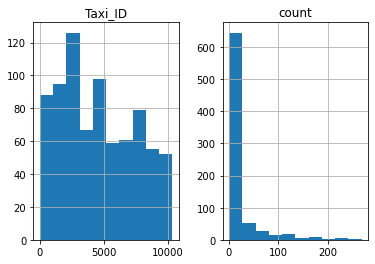

In [13]:
#count_dup_df["Taxi_ID"].plot.bar()
#plt.show()
count_dup_df.hist()

In [14]:
unique_df = data.drop_duplicates(keep='first')
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158226 entries, 0 to 176423
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Taxi_ID     158226 non-null  int64         
 1   Time_Stamp  158226 non-null  datetime64[ns]
 2   Longitude   158226 non-null  float64       
 3   Latitude    158226 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.0 MB


In [15]:
len(unique_df.Taxi_ID.unique())

1106

In [16]:
users = unique_df.Taxi_ID.unique()
df_user = DataFrame(users,columns=['Taxi_ID'])
df_user['Glitch'] = False
df_user.head()

,Taxi_ID,Glitch
0,10004,False
1,10043,False
2,10057,False
3,10065,False
4,101,False


In [17]:
has_glitch = True
for i in range(len(users)):
    temp = unique_df.loc[(unique_df['Taxi_ID'] == users[i])]
    temp['Glitch'] = temp.Time_Stamp.shift() > temp.Time_Stamp  
    if has_glitch in temp['Glitch'].unique():
        print(temp.head())
        df_user['Glitch'].loc[(df_user['Taxi_ID'] == users[i])] = True

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
temp.head()

,Taxi_ID,Time_Stamp,Longitude,Latitude,Glitch
176420,9984,2008-02-04 21:56:28,116.39043,39.94758,False
176421,9984,2008-02-05 22:06:10,116.29870,39.94303,False
176422,9984,2008-02-07 11:45:48,115.93919,40.46609,False
176423,9984,2008-02-08 11:55:29,116.09359,40.51493,False


In [19]:
df_user.head()

,Taxi_ID,Glitch
0,10004,False
1,10043,False
2,10057,False
3,10065,False
4,101,False


In [20]:
df_user['Glitch'].unique()

array([False])

In [21]:
len(df_user.loc[(df_user['Glitch'] == False)])

1106

In [22]:
glitch_df = df_user.loc[(df_user['Glitch'] == False)]
glitch_df.Taxi_ID.unique()

array([10004, 10043, 10057, ...,  9971,  9979,  9984], dtype=int64)

In [23]:
tempX = unique_df.loc[(unique_df['Taxi_ID'] == 10004)]
tempX['Glitch'] = tempX.Time_Stamp.shift() > tempX.Time_Stamp 
tempX.head(20)

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Taxi_ID,Time_Stamp,Longitude,Latitude,Glitch
0,10004,2008-02-03 09:21:37,116.58327,40.11703,False
1,10004,2008-02-04 02:35:46,116.48178,39.98753,False
2,10004,2008-02-04 19:57:44,116.34258,39.78857,False
3,10004,2008-02-04 19:57:46,116.34258,39.78857,False
4,10004,2008-02-05 20:12:11,116.42787,39.94505,False
5,10004,2008-02-06 20:21:54,116.70098,40.19251,False
6,10004,2008-02-08 00:34:17,116.70020,40.19260,False
7,10004,2008-02-08 11:12:17,116.70022,40.19261,False


In [24]:
unique_df.head(10)

,Taxi_ID,Time_Stamp,Longitude,Latitude
0,10004,2008-02-03 09:21:37,116.58327,40.11703
1,10004,2008-02-04 02:35:46,116.48178,39.98753
2,10004,2008-02-04 19:57:44,116.34258,39.78857
3,10004,2008-02-04 19:57:46,116.34258,39.78857
4,10004,2008-02-05 20:12:11,116.42787,39.94505
5,10004,2008-02-06 20:21:54,116.70098,40.19251
6,10004,2008-02-08 00:34:17,116.70020,40.19260
7,10004,2008-02-08 11:12:17,116.70022,40.19261
8,10043,2008-02-06 09:27:33,116.41921,39.93990
9,10043,2008-02-06 09:32:33,116.41921,39.94700


In [25]:
speed_df = unique_df

In [26]:
vehicles = speed_df.Taxi_ID.unique()
avg_speed_df = pd.DataFrame()
for n,t in enumerate(vehicles): 
    temp = speed_df[speed_df["Taxi_ID"]==t]
    temp['Time_gap'] = temp.Time_Stamp - temp.Time_Stamp.shift()  
    temp['Time_gap'] = temp['Time_gap'].astype('timedelta64[h]')
    time = temp["Time_gap"].tolist()
    lons = temp["Longitude"].tolist()
    lats = temp["Latitude"].tolist()
    t_stamp = temp["Time_Stamp"].tolist()
    lat_lng =list(zip(lats,lons))
    dist = ["NA"]
    time_dif = ["NA"]
    speed = ["NA"]
    for n,p in enumerate(lat_lng): 
        if not n==0:  
            y = hs.haversine(lat_lng[n], lat_lng[n-1])
            #y = geodesic(lat_lng[n], lat_lng[n-1])
            t = time[n]-time[n-1]
            if not t == 0:
                speed.append(y/t)
            else: speed.append("NA")
    temp["Time_Stamp"] = t_stamp 
    temp['speed'] = speed
    temp['speed'] = temp['speed'].fillna(0)
    temp['speed'] = temp['speed'].replace('NA',0)
    avg_speed_df = avg_speed_df.append(temp)

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [27]:
avg_speed_df.head()

,Taxi_ID,Time_Stamp,Longitude,Latitude,Time_gap,speed
0,10004,2008-02-03 09:21:37,116.58327,40.11703,NaN,0.000000
1,10004,2008-02-04 02:35:46,116.48178,39.98753,17.0,0.000000
2,10004,2008-02-04 19:57:44,116.34258,39.78857,17.0,0.000000
3,10004,2008-02-04 19:57:46,116.34258,39.78857,0.0,-0.000000
4,10004,2008-02-05 20:12:11,116.42787,39.94505,24.0,0.785878


In [28]:
avg_speed_df.tail()

,Taxi_ID,Time_Stamp,Longitude,Latitude,Time_gap,speed
176419,9979,2008-02-08 00:25:28,116.38899,39.97050,0.0,0.000000
176420,9984,2008-02-04 21:56:28,116.39043,39.94758,NaN,0.000000
176421,9984,2008-02-05 22:06:10,116.29870,39.94303,24.0,0.000000
176422,9984,2008-02-07 11:45:48,115.93919,40.46609,37.0,5.052927
176423,9984,2008-02-08 11:55:29,116.09359,40.51493,24.0,-1.087790


In [29]:
len(avg_speed_df.Taxi_ID.unique())

1106

In [30]:
avg_speed_df

,Taxi_ID,Time_Stamp,Longitude,Latitude,Time_gap,speed
0,10004,2008-02-03 09:21:37,116.58327,40.11703,NaN,0.000000
1,10004,2008-02-04 02:35:46,116.48178,39.98753,17.0,0.000000
2,10004,2008-02-04 19:57:44,116.34258,39.78857,17.0,0.000000
3,10004,2008-02-04 19:57:46,116.34258,39.78857,0.0,-0.000000
4,10004,2008-02-05 20:12:11,116.42787,39.94505,24.0,0.785878
...,...,...,...,...,...,...
176419,9979,2008-02-08 00:25:28,116.38899,39.97050,0.0,0.000000
176420,9984,2008-02-04 21:56:28,116.39043,39.94758,NaN,0.000000
176421,9984,2008-02-05 22:06:10,116.29870,39.94303,24.0,0.000000
176422,9984,2008-02-07 11:45:48,115.93919,40.46609,37.0,5.052927


In [31]:
high_speed_df = avg_speed_df.loc[(avg_speed_df['speed'] > 120) | (avg_speed_df['speed'] < -120)]
high_speed_df['speed'] = high_speed_df['speed'].abs()
high_speed_df.describe()

C:\Users\user\anaconda3New\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Taxi_ID,Longitude,Latitude,Time_gap,speed
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5616.950617,81.079797,27.195475,8.506173,1976.481089
std,2686.961243,53.287203,17.959464,12.167707,2810.738428
min,316.000000,0.000000,0.000000,0.000000,124.682432
25%,3190.000000,0.000000,0.000000,1.000000,359.413029
50%,5957.000000,116.339330,39.738320,5.000000,861.170603
75%,7872.000000,116.584120,39.979080,9.000000,2354.674167
max,9635.000000,120.268670,44.769230,64.000000,12235.452063


In [32]:
high_speed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 17883 to 169609
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Taxi_ID     81 non-null     int64         
 1   Time_Stamp  81 non-null     datetime64[ns]
 2   Longitude   81 non-null     float64       
 3   Latitude    81 non-null     float64       
 4   Time_gap    81 non-null     float64       
 5   speed       81 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.4 KB


In [33]:
len(high_speed_df.Taxi_ID.unique())

47

In [34]:
d1 = high_speed_df.drop(['Time_gap','speed'], axis=1)
d2 = avg_speed_df.drop(['Time_gap','speed'], axis=1)

In [35]:
d1 = d1
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 17883 to 169609
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Taxi_ID     81 non-null     int64         
 1   Time_Stamp  81 non-null     datetime64[ns]
 2   Longitude   81 non-null     float64       
 3   Latitude    81 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.2 KB


In [36]:
d1.head()

,Taxi_ID,Time_Stamp,Longitude,Latitude
17883,1735,2008-02-04 13:22:05,0.00000,0.00000
20505,1846,2008-02-04 05:57:11,116.32317,39.92357
20517,1846,2008-02-04 11:09:18,0.00000,0.00000
20526,1846,2008-02-04 23:30:46,116.32472,39.92300
24101,1903,2008-02-02 18:47:21,110.88076,39.89635


In [37]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158226 entries, 0 to 176423
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Taxi_ID     158226 non-null  int64         
 1   Time_Stamp  158226 non-null  datetime64[ns]
 2   Longitude   158226 non-null  float64       
 3   Latitude    158226 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.0 MB


In [38]:
d2.head()

,Taxi_ID,Time_Stamp,Longitude,Latitude
0,10004,2008-02-03 09:21:37,116.58327,40.11703
1,10004,2008-02-04 02:35:46,116.48178,39.98753
2,10004,2008-02-04 19:57:44,116.34258,39.78857
3,10004,2008-02-04 19:57:46,116.34258,39.78857
4,10004,2008-02-05 20:12:11,116.42787,39.94505


In [39]:
df = pd.concat([d1, d2])
df.drop_duplicates(keep=False)

,Taxi_ID,Time_Stamp,Longitude,Latitude
0,10004,2008-02-03 09:21:37,116.58327,40.11703
1,10004,2008-02-04 02:35:46,116.48178,39.98753
2,10004,2008-02-04 19:57:44,116.34258,39.78857
3,10004,2008-02-04 19:57:46,116.34258,39.78857
4,10004,2008-02-05 20:12:11,116.42787,39.94505
...,...,...,...,...
176419,9979,2008-02-08 00:25:28,116.38899,39.97050
176420,9984,2008-02-04 21:56:28,116.39043,39.94758
176421,9984,2008-02-05 22:06:10,116.29870,39.94303
176422,9984,2008-02-07 11:45:48,115.93919,40.46609


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158307 entries, 17883 to 176423
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Taxi_ID     158307 non-null  int64         
 1   Time_Stamp  158307 non-null  datetime64[ns]
 2   Longitude   158307 non-null  float64       
 3   Latitude    158307 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.0 MB


In [41]:
df.describe()

,Taxi_ID,Longitude,Latitude
count,158307.000000,158307.000000,158307.000000
mean,4627.114550,110.718994,37.983630
std,2895.539417,25.131636,8.624737
min,7.000000,0.000000,0.000000
25%,2131.000000,116.326080,39.881820
50%,4307.000000,116.397100,39.919890
75%,7231.000000,116.457245,39.970620
max,10355.000000,133.319950,48.277500


In [42]:
len(df.Taxi_ID.unique())

1106